In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so


## Contenu du csv

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [3]:
#Pour les 21613 entrées, il n'y a aucune valeur nulle

In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Maps


In [5]:
import folium
from branca.element import Figure
fig = Figure(width=600, height=400)
m = folium.Map(location=[47.570689, -122.090698], zoom_start=9)
data = pd.read_csv('kc_house_data.csv')
data = data.sample(1000)[['lat','long']]
for i, j in data.iterrows():
    folium.Marker(
        location=[j['lat'], j['long']]
    ).add_to(m)
fig.add_child(m)

In [6]:
# Représentation geographique d'un echantillon de 1000 biens

In [7]:
#on separe les prix en déciles dans le but de leur attribuer une couleur en fonction de leur valeur
df = df[['price']].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
df.transpose()

0.0       0.1       0.2       0.3       0.4       0.5       0.6  \
price  75000.0  245000.0  298470.0  345000.0  399500.0  450000.0  519000.0   

            0.7       0.8       0.9        1.0  
price  595000.0  700108.0  887000.0  7700000.0

In [8]:
def setpricecolor(x)-> str:
    """_summary_
        Regarde dans quel fourchette de déciles de prix le prix se situe
        Renvoie un code hexadécimal correspondant à sa position sur un dégradé entre
        le vert et le rouge
    Args:
        x (_type_): _description_
        prix du bien
    Returns:
        str: _description_
        #code hexadicimal qui sera utilisé sur la carte
    """
    if x >= 75000 and x < 245000:
        return '#006400'
    elif x >= 245000 and x < 298470:
        return '#008000'
    elif x >= 298470 and x < 345000:
        return '#9ACD32'
    elif x >= 345000 and x < 450000:
        return '#FFFF00'
    elif x >= 450000 and x < 519000:
        return '#FFA500'
    elif x >= 519000 and x < 700108:
        return '#FF4500'
    elif x >= 700108 and x < 887000:
        return '#FF0000'
    elif x >= 887000:
        return '#8B0000'


In [9]:
fig = Figure(width=600, height=400)
m = folium.Map(location=[47.570689, -122.090698], zoom_start=9)
data = pd.read_csv('kc_house_data.csv')
data = data.sample(5000)[['price','lat','long']]
data['color'] = data['price'].apply(setpricecolor)
for i, j in data.iterrows():
    folium.Circle(
        radius=1,
        location=[j['lat'], j['long']],
        color=j['color']
    ).add_to(m)
fig.add_child(m)

In [10]:
# Vert : bien les moins chers / Rouge : bien les plus chers sur un échantillon de 5000 biens

In [11]:
df = pd.read_csv('kc_house_data.csv')
df_average = df.set_index('id')
df_average = df_average.mean(numeric_only=True)
df_average

price            540088.141767
bedrooms              3.370842
bathrooms             2.114757
sqft_living        2079.899736
sqft_lot          15106.967566
floors                1.494309
waterfront            0.007542
view                  0.234303
condition             3.409430
grade                 7.656873
sqft_above         1788.390691
sqft_basement       291.509045
yr_built           1971.005136
yr_renovated         84.402258
zipcode           98077.939805
lat                  47.560053
long               -122.213896
sqft_living15      1986.552492
sqft_lot15        12768.455652
dtype: float64

In [12]:
#Il y a une coherence globale. Notons que 'waterfront', 'view', 'condition', et 'grade' ont des valeurs par index.

## Surfaces

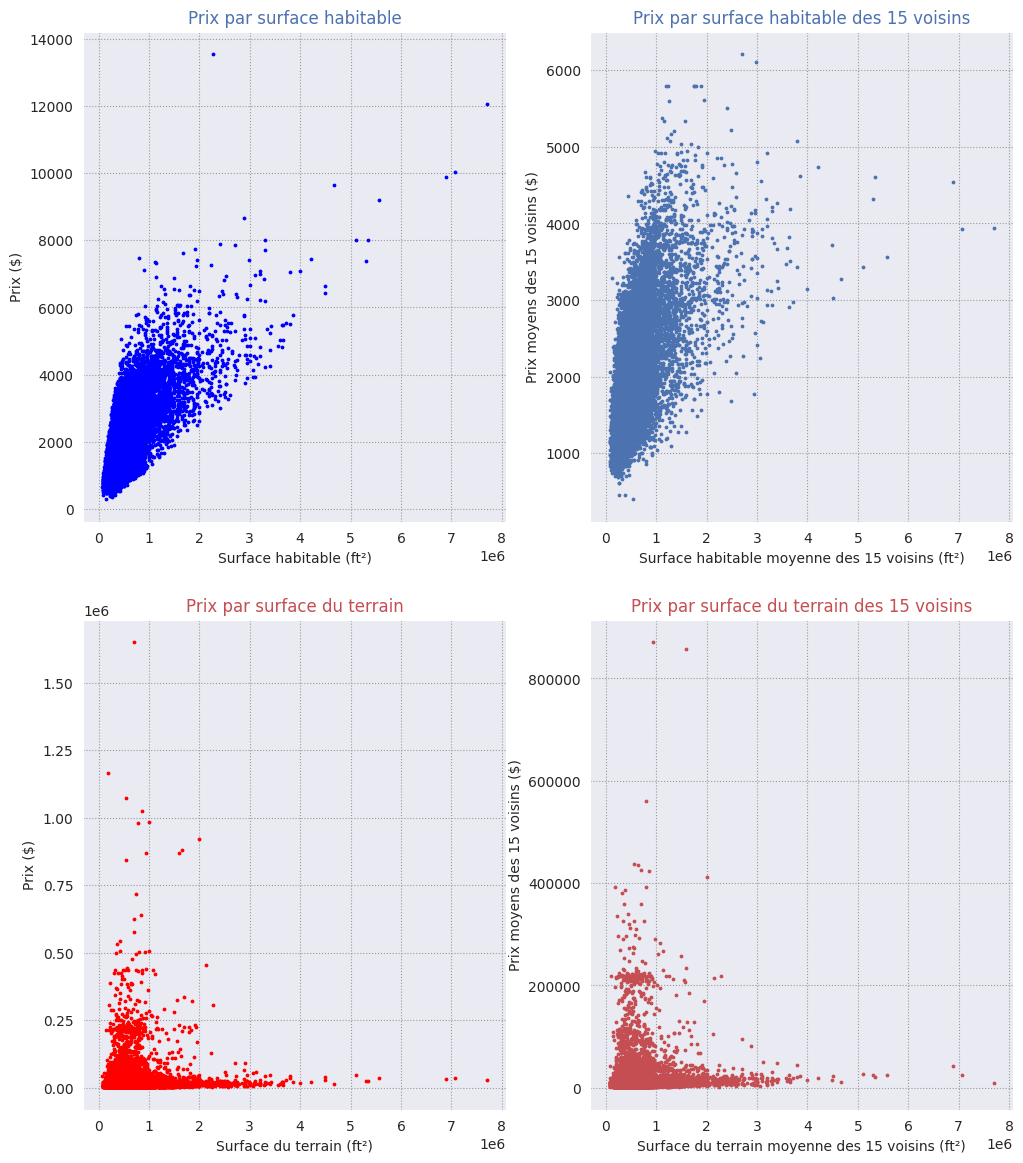

In [53]:
df = pd.read_csv('kc_house_data.csv')
sns.set_style('darkgrid', {"grid.color": ".6", "grid.linestyle": ":"})
plt.figure(figsize=(12,14))
plt.subplot(2,2,1)
plt.ylabel('Prix ($)')
plt.xlabel('Surface habitable (ft²)')
plt.title('Prix par surface habitable', c='b')
plt.scatter(df.price, df.sqft_living, s=3, c='blue')
plt.subplot(2,2,2)
plt.ylabel('Prix moyens des 15 voisins ($)')
plt.xlabel('Surface habitable moyenne des 15 voisins (ft²)')
plt.title('Prix par surface habitable des 15 voisins', c='b')
plt.scatter(df.price, df.sqft_living15, s=3, c='b')
plt.subplot(2,2,3)
plt.scatter(df.price, df.sqft_lot, s=3, c='red')
plt.ylabel('Prix ($)')
plt.xlabel('Surface du terrain (ft²)')
plt.title('Prix par surface du terrain', c='r')
plt.subplot(2,2,4)
plt.scatter(df.price, df.sqft_lot15, s=3, c='r')
plt.ylabel('Prix moyens des 15 voisins ($)')
plt.xlabel('Surface du terrain moyenne des 15 voisins (ft²)')
plt.title('Prix par surface du terrain des 15 voisins', c='r')

plt.show()
sns.reset_defaults()

In [14]:
#Le schema de point étant le même entre le bien et ses 15 voisins globalement, il est possible que l'on droppe sqft_living15 et sqft_lot15 pour l'entrainement

## Pièces et étages

### bedrooms

In [15]:
df = pd.read_csv('kc_house_data.csv')
df1 = df.groupby(['bedrooms']).count()[['id']]
df1 = df1.rename(columns={'id':'total'})
df2 = df.groupby(['bedrooms']).mean(numeric_only=True)[['price']]
df2 = df2.round().rename(columns={'price':'average_price'})
dfbedrooms = pd.concat([df1, df2], axis=1)
dfbedrooms.transpose()


bedrooms             0         1         2         3         4         5   \
total              13.0     199.0    2760.0    9824.0    6882.0    1601.0   
average_price  409504.0  317643.0  401373.0  466232.0  635420.0  786600.0   

bedrooms             6         7          8         9         10        11  \
total             272.0      38.0       13.0       6.0       3.0       1.0   
average_price  825521.0  951185.0  1105077.0  894000.0  819333.0  520000.0   

bedrooms             33  
total               1.0  
average_price  640000.0

In [16]:
# 📝 Valeurs abérrantes à 0 seront à nettoyer. Valeurs extrêmes seront à étudier

### bathrooms

In [17]:
df1 = df.groupby(['bathrooms']).count()[['id']]
df1 = df1.rename(columns={'id':'total'})
df2 = df.groupby(['bathrooms']).mean(numeric_only=True)[['price']]
df2 = df2.round().rename(columns={'price':'average_price'})
dfbathroom = pd.concat([df1, df2], axis=1)
dfbathroom.transpose()

bathrooms          0.00      0.50      0.75      1.00      1.25      1.50  \
total              10.0       4.0      72.0    3852.0       9.0    1446.0   
average_price  448160.0  237375.0  294521.0  347041.0  621217.0  409322.0   

bathrooms          1.75      2.00      2.25      2.50  ...       5.25  \
total            3048.0    1930.0    2047.0    5380.0  ...       13.0   
average_price  454896.0  457890.0  533677.0  553597.0  ...  1817177.0   

bathrooms           5.50       5.75       6.00       6.25       6.50  \
total               10.0        4.0        6.0        2.0        2.0   
average_price  2522300.0  2492500.0  2946833.0  3094000.0  1709445.0   

bathrooms           6.75      7.50       7.75       8.00  
total                2.0       1.0        1.0        2.0  
average_price  2734000.0  450000.0  6885000.0  4990000.0  

[2 rows x 30 columns]

### floors

In [18]:
df1 = df.groupby(['floors']).count()[['id']]
df1 = df1.rename(columns={'id':'total'})
df2 = df.groupby(['floors']).mean(numeric_only=True)[['price']]
df2 = df2.round().rename(columns={'price':'average_price'})
dffloors = pd.concat([df1, df2], axis=1)
dffloors.transpose()

floors              1.0       1.5       2.0        2.5       3.0       3.5
total           10680.0    1910.0    8241.0      161.0     613.0       8.0
average_price  442181.0  558981.0  648891.0  1060346.0  582526.0  933312.0

## Notes

### Waterfront

In [19]:
df1 = df.groupby(['waterfront']).count()[['id']]
df1 = df1.rename(columns={'id':'total'})
df2 = df.groupby(['waterfront']).mean(numeric_only=True)[['price']]
df2 = df2.round().rename(columns={'price':'average_price'})
dfwaterfront = pd.concat([df1, df2], axis=1)
dfwaterfront

total  average_price
waterfront                      
0           21450       531564.0
1             163      1661876.0

In [20]:
#📝La colonne waterfront est sensiblement un booléen 0 ou 1, seul 0,75% des entrées ont une vue sur la mer. Mais il y a une grosse incidence sur le prix.</p>

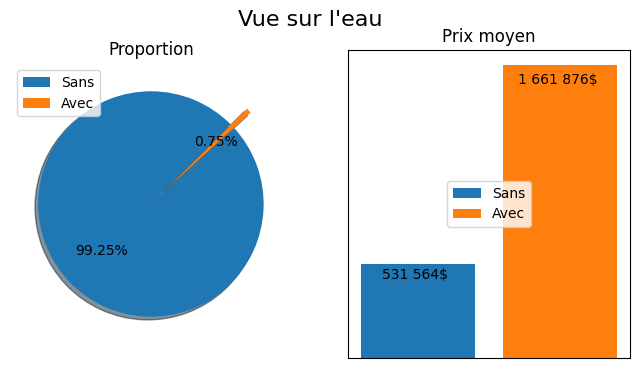

In [21]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))
f.suptitle("Vue sur l'eau", fontsize=16)
ax1.pie(dfwaterfront.total, autopct="%1.2f%%",  startangle=45, explode=[0,0.2], shadow=True)
ax1.legend(['Sans', 'Avec'])
ax1.set_title('Proportion')
ax2.bar(dfwaterfront.index[0], dfwaterfront.average_price[0], label='Sans')
ax2.bar(dfwaterfront.index[1], dfwaterfront.average_price[1], label='Avec')
ax2.legend(loc = 10)
ax2.text(-0.25, 450000,'531 564$')
ax2.text(0.70, 1550000, '1 661 876$')
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
ax2.set_title('Prix moyen')
plt.show()

In [22]:
#📝 Un bien qui possede une vue sur la mer voit son prix tripler en moyenne.

In [23]:
fig = Figure(width=600, height=400)
m = folium.Map(location=[47.570689, -122.190698], zoom_start=10)
data = pd.read_csv('kc_house_data.csv')
data = data[['lat', 'long', 'waterfront']]
data = data[data['waterfront'] == 1]
for i, j in data.iterrows():
    folium.Circle(
        radius=250,
        location=[j['lat'], j['long']],
    ).add_to(m)
fig.add_child(m)

In [24]:
# Positions des biens avec vue sur l'eau

### View

In [25]:
df1 = df.groupby(['view']).count()[['id']]
df1 = df1.rename(columns={'id':'total'})
df2 = df.groupby(['view']).mean(numeric_only=True)[['price']]
df2 = df2.round().rename(columns={'price':'average_price'})
dfview = pd.concat([df1, df2], axis=1)
dfview

total  average_price
view                      
0     19489       496564.0
1       332       812281.0
2       963       792401.0
3       510       971965.0
4       319      1463711.0

In [26]:
# 📝 90,17% des biens ont un score de vue à 0 mais on note une incidence sur le prix.

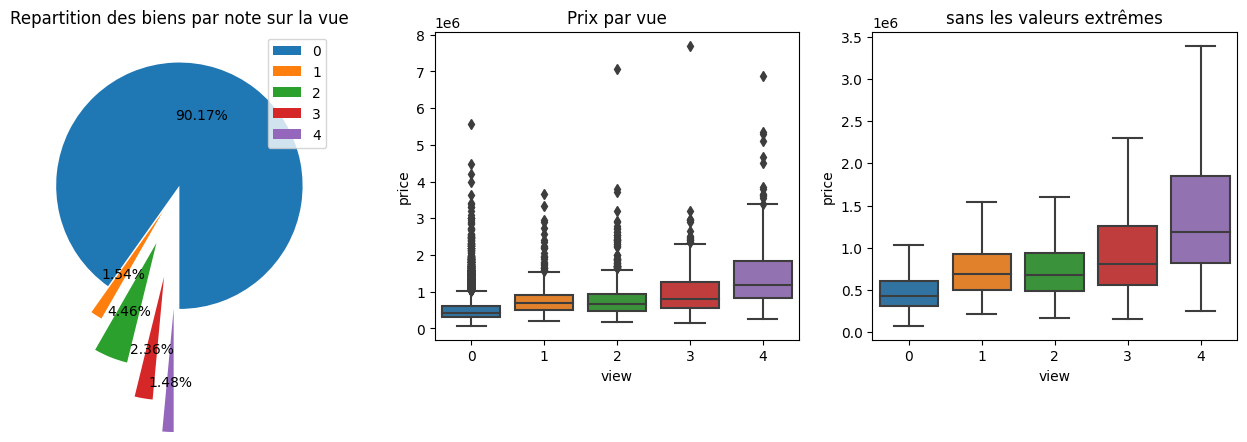

In [27]:
df = pd.read_csv('kc_house_data.csv')
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.pie(data=dfview, x=dfview.total, autopct="%1.2f%%", explode=[0,0.25,0.5,0.75,1], startangle=-90)
plt.title('Repartition des biens par note sur la vue')
plt.legend(['0','1','2','3','4'],loc=1)
# ax1.pie(dfwaterfront.total, autopct="%1.2f%%",  startangle=45, explode=[0,0.2], shadow=True)
plt.subplot(1, 3, 2)
sns.boxplot(data = df,x = "view" ,y= "price")
plt.title("Prix par vue")

plt.subplot(1, 3, 3)
sns.boxplot(data = df,x = "view" ,y= "price", showfliers = False)
plt.title("sans les valeurs extrêmes")
plt.show()

In [28]:
# 📝 Les prix ont tendance à être plus elevés si la vue est bien notée.

In [29]:
colorprice = {
    1 : 'orange',
    2 : 'green' ,
    3 : 'red' ,
    4 : 'purple'
}
fig = Figure(width=600, height=400)
m = folium.Map(location=[47.570689, -122.190698], zoom_start=10)
data = pd.read_csv('kc_house_data.csv')
data = data[['lat', 'long', 'view']]
data = data[data['view'] > 0]
data['color'] = data['view'].apply(lambda x : colorprice[x])
for i, j in data.iterrows():
    folium.Circle(
        radius=10,
        location=[j['lat'], j['long']],
        color=j['color']
    ).add_to(m)
fig.add_child(m)

In [30]:
from folium.map import Layer, LayerControl
fig = Figure(width=600, height=400)
m = folium.Map(location=[47.570689, -122.190698], zoom_start=10)
data = pd.read_csv('kc_house_data.csv')
data = data[['lat', 'long', 'view']]
data1 = data[data['view'] == 1]
data2 = data[data['view'] == 2]
data3 = data[data['view'] == 3]
data4 = data[data['view'] == 4]
class Purple(Layer):
    for i, j in data4.iterrows():
        folium.Circle(
            radius=200,
            location=[j['lat'], j['long']],
            color='purple'
    ).add_to(m)
        
class Red(Layer):
    for i, j in data3.iterrows():
        folium.Circle(
            radius=150,
            location=[j['lat'], j['long']],
            color='red'
    ).add_to(m) 
               
class Green(Layer):
    for i, j in data2.iterrows():
        folium.Circle(
            radius=150,
            location=[j['lat'], j['long']],
            color='green'
    ).add_to(m)
        
class Orange(Layer):
    for i, j in data1.iterrows():
        folium.Circle(
            radius=150,
            location=[j['lat'], j['long']],
            color='orange'
    ).add_to(m)
fig.add_child(m)

In [31]:
# Positions des biens ayant une vue superieure à zero

In [32]:
# 📝 Les biens les mieux notés sont près des cotes

### Condition

In [33]:
df1 = df.groupby(['condition']).count()[['id']]
df1 = df1.rename(columns={'id':'total'})
df2 = df.groupby(['condition']).mean(numeric_only=True)[['price']]
df2 = df2.round().rename(columns={'price':'average_price'})
dfcondition= pd.concat([df1, df2], axis=1)
dfcondition

total  average_price
condition                      
1             30       334432.0
2            172       327287.0
3          14031       542013.0
4           5679       521200.0
5           1701       612418.0

In [34]:
#📝Bien que seul 0,93% des biens ont une note en dessous de 3, on note une repercussion sur le prix à la baisse.

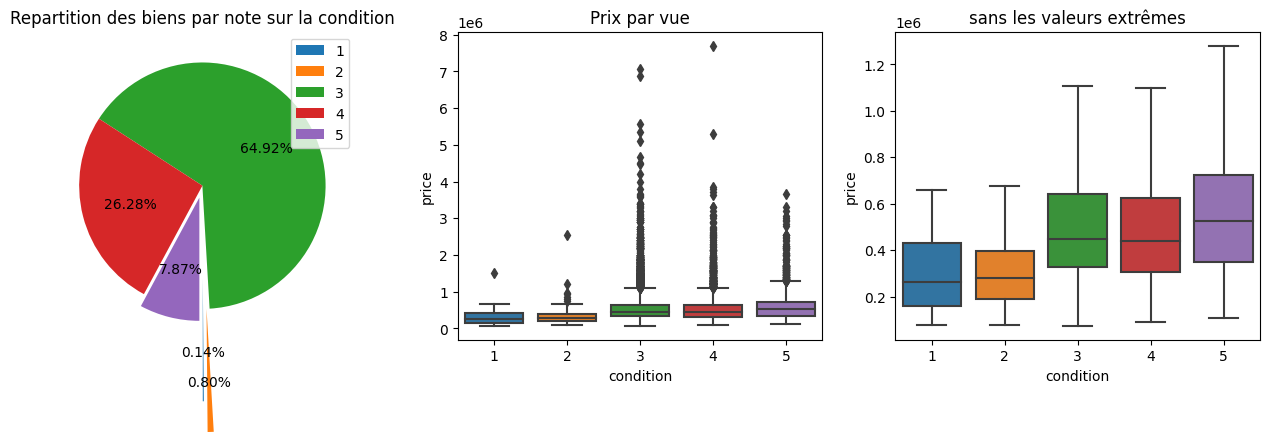

In [35]:
df = pd.read_csv('kc_house_data.csv')
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.pie(data=dfcondition, x=dfcondition.total, autopct="%1.2f%%", explode=[0.75,1,0,0,0.1], startangle=-90)
plt.title('Repartition des biens par note sur la condition')
plt.legend(['1','2','3','4','5'],loc=1)
# ax1.pie(dfwaterfront.total, autopct="%1.2f%%",  startangle=45, explode=[0,0.2], shadow=True)
plt.subplot(1, 3, 2)
sns.boxplot(data = df,x = "condition" ,y= "price")
plt.title("Prix par vue")

plt.subplot(1, 3, 3)
sns.boxplot(data = df,x = "condition" ,y= "price", showfliers = False)
plt.title("sans les valeurs extrêmes")
plt.show()

In [36]:
#📝 Les notes 1 et 2 baissent beaucoup le prix, 3, 4 sont sensiblement sur les même moyennes. 5 augemente un peu le prix.

### Grade

In [37]:
df1 = df.groupby(['grade']).count()[['id']]
df1 = df1.rename(columns={'id':'total'})
df2 = df.groupby(['grade']).mean(numeric_only=True)[['price']]
df2 = df2.round().rename(columns={'price':'average_price'})
dfgrade= pd.concat([df1, df2], axis=1)
dfgrade

total  average_price
grade                      
1          1       142000.0
3          3       205667.0
4         29       214381.0
5        242       248524.0
6       2038       301920.0
7       8981       402590.0
8       6068       542853.0
9       2615       773513.0
10      1134      1071771.0
11       399      1496842.0
12        90      2191222.0
13        13      3709615.0

In [38]:
# 📝La correlation entre la notation et le prix semble linéaire.

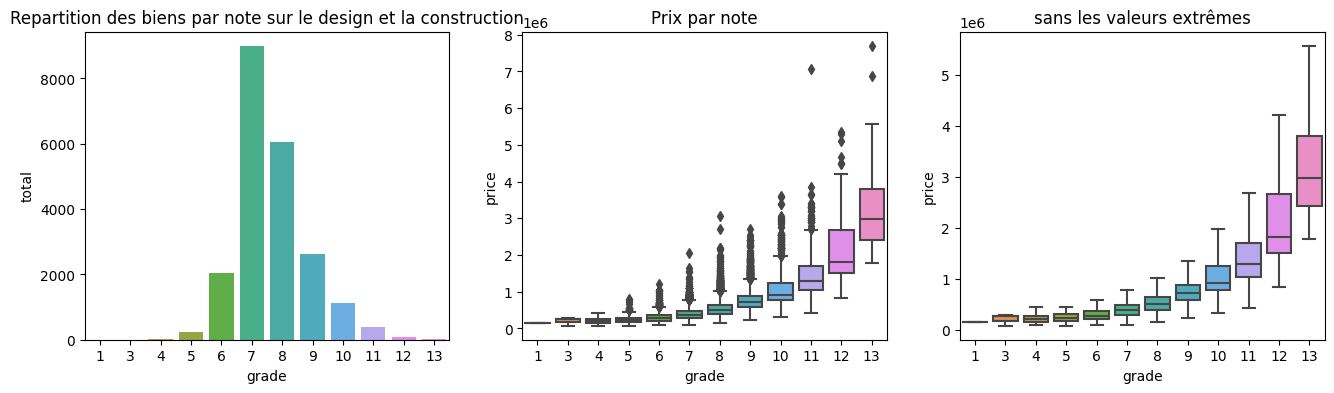

In [39]:
df = pd.read_csv('kc_house_data.csv')
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
sns.barplot(x= dfgrade.index, y=dfgrade.total)
plt.title('Repartition des biens par note sur le design et la construction')
plt.subplot(1, 3, 2)
sns.boxplot(data = df,x = "grade" ,y= "price")
plt.title("Prix par note")

plt.subplot(1, 3, 3)
sns.boxplot(data = df,x = "grade" ,y= "price", showfliers = False)
plt.title("sans les valeurs extrêmes")
plt.show()

In [40]:
#📝La correlation entre la notation est plutôt exponentielle.

## Sqft above and basement

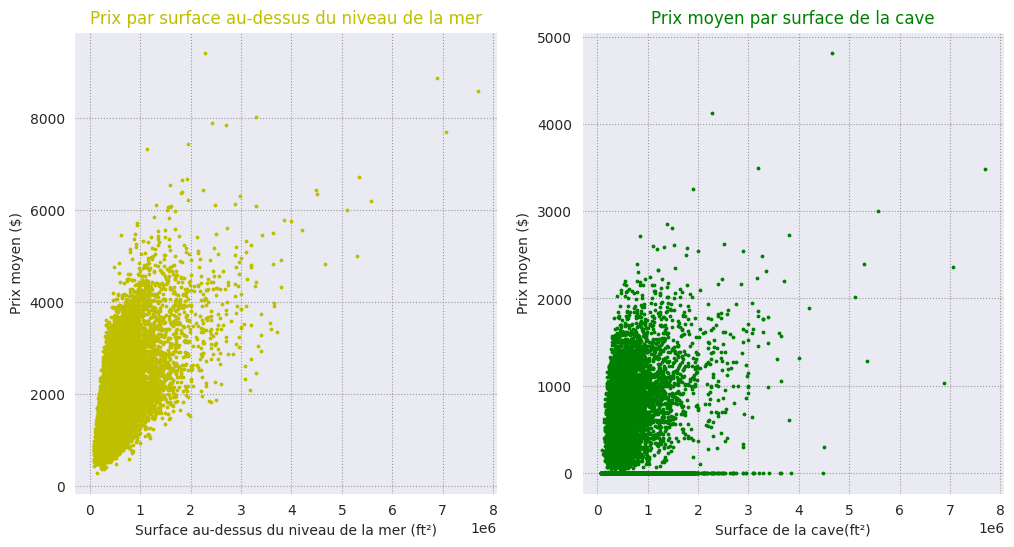

In [41]:
df = pd.read_csv('kc_house_data.csv')
sns.set_style('darkgrid', {"grid.color": ".6", "grid.linestyle": ":"})
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.ylabel('Prix moyen ($)')
plt.xlabel('Surface au-dessus du niveau de la mer (ft²)')
plt.title('Prix par surface au-dessus du niveau de la mer', c='y')
plt.scatter(df.price, df.sqft_above, s=3, c='y')
plt.subplot(1,2,2)
plt.ylabel('Prix moyen ($)')
plt.xlabel('Surface de la cave(ft²)')
plt.title('Prix moyen par surface de la cave', c='g')
plt.scatter(df.price, df.sqft_basement, s=3, c='g')


plt.show()
sns.reset_defaults()

In [42]:
# on droppe sqft_above car le scatter est trop proche de sqft_living, sqft_basement sera optionnel dans la stratégie

## yr_built et yr_renovated

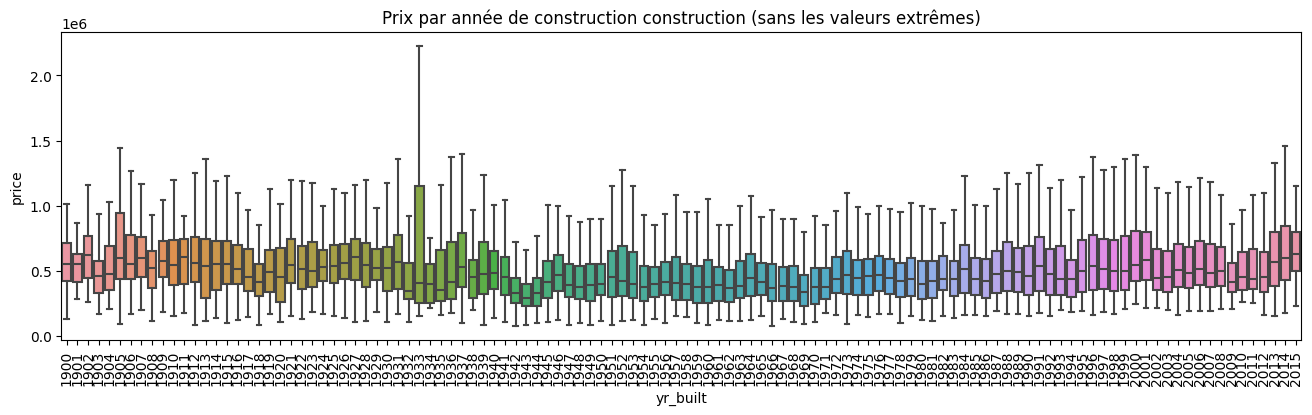

In [43]:
df = pd.read_csv('kc_house_data.csv')
plt.figure(figsize=(16,4))
plt.subplot()
ax = sns.boxplot(x= df.yr_built, y=df.price, showfliers = False)
plt.title('Prix par année de construction construction (sans les valeurs extrêmes)',)
plt.setp(ax.get_xticklabels(), rotation=90, fontsize=10)
plt.show()

In [44]:
#Pas de vraie plus value sur l'année de construction observable
# optionnel pour la stratégie

In [45]:
df = pd.read_csv('kc_house_data.csv')
df = df[['price', 'yr_built', 'yr_renovated']]
#on separe les maisons ayant une données à renovated
df1 = df[df['yr_renovated'] > 0 ]
df2 = df[df['yr_renovated'] == 0 ]
df1 = df1.groupby(['yr_built']).mean()[['price']]
df1 = df1.rename(columns={'price':'price_renovated'})
df2 = df2.groupby(['yr_built']).mean()[['price']]
df2 = df2.rename(columns={'price':'price_never_renovated'})
df = pd.concat([df1,df2])
df = df.dropna()
df

Empty DataFrame
Columns: [price_renovated, price_never_renovated]
Index: []

In [46]:
# Aucune année possede à la fois une entrée seulement yr_built et yr_built + yr_renovated
# ce qui veut dire qu'on ne peut pas comparer les prix entre les maisons renovées et jamais renovées

## Zipcode

In [47]:
df = pd.read_csv('kc_house_data.csv')
df['zipcode'] = df['zipcode'].apply(lambda x : str(x))
df1 = df.groupby(['zipcode']).count()[['id']]
df1 = df1.rename(columns={'id':'total'})
df2 = df.groupby(['zipcode']).mean(numeric_only=True)[['price']]
df2 = df2.round().rename(columns={'price':'average_price'})
dfzipcode = pd.concat([df1, df2], axis=1)
dfzipcode.sort_values(['average_price'], ascending=False)

total  average_price
zipcode                      
98039       50      2160607.0
98004      317      1355927.0
98040      282      1194230.0
98112      269      1095499.0
98102      105       901258.0
...        ...            ...
98148       57       284909.0
98001      362       280805.0
98032      125       251296.0
98168      269       240328.0
98002      199       234284.0

[70 rows x 2 columns]

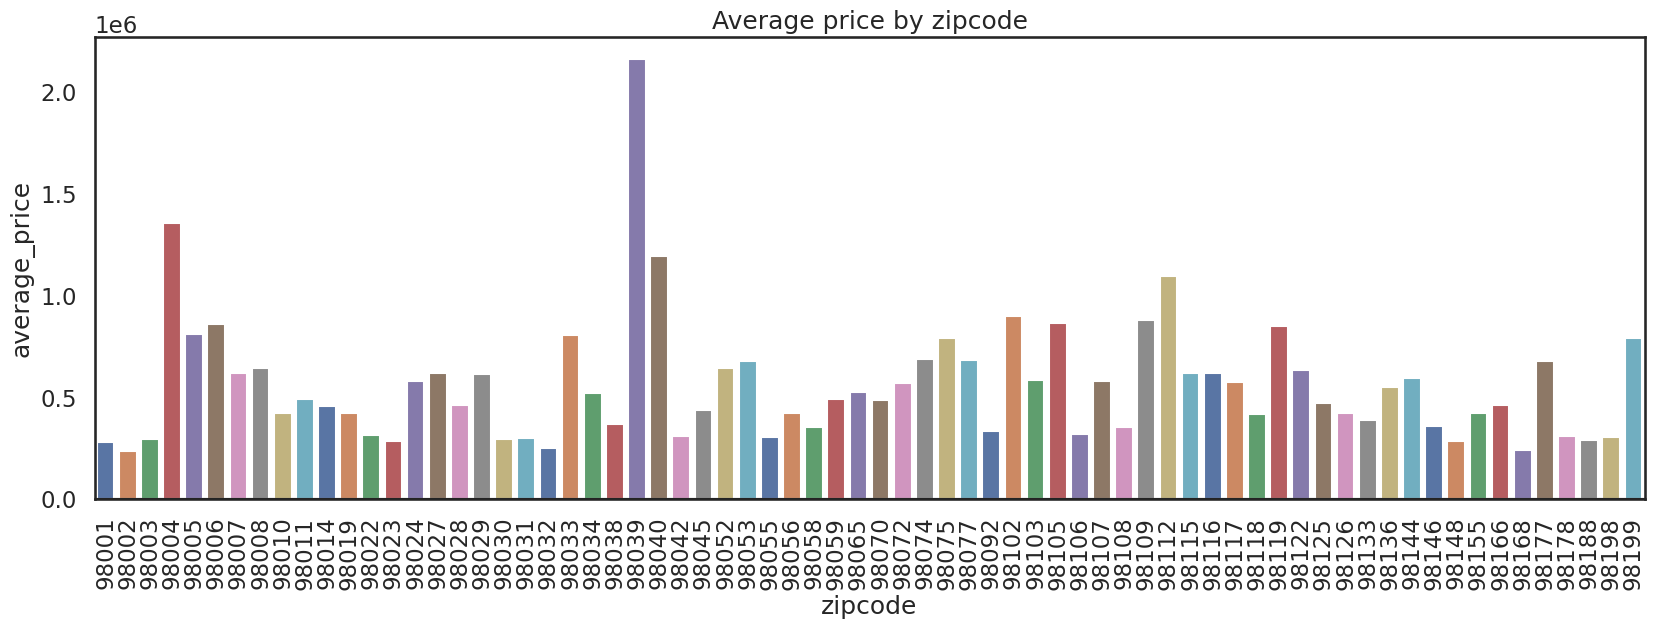

In [48]:
sns.set_theme(style='white', context='talk')
f, ax = plt.subplots(figsize=(20,6), sharex=True)
sns.barplot(x=dfzipcode.index, y=dfzipcode.average_price, palette='deep', ax=ax)
ax.axhline(0, color='k')
ax.set_title('Average price by zipcode')
ax.set_xticklabels(labels=dfzipcode.index,rotation=90)
plt.show()

In [49]:
# 50 biens ont le zipcode 98039 et ont presque le double de prix moyen des
# autres zipcodes les plus chers